__Collaborators__: Ben Ohno, Edward Wang, Xincheng You

# Homework 7

## APMTH 207: Stochastic Methods for Data Analysis, Inference and Optimization

**Due Date: ** Friday, March 23rd, 2018 at 11:00am

**Instructions:**

- Upload your final answers as a Jupyter notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy.stats import uniform, gamma, beta, binom
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.mlab as mlab

## Problem 1: Gibbs Sampling On A Bivariate Normal

Let $\mathbf{X}$ be a random variable taking values in $\mathbb{R}^2$. That is, $\mathbf{X}$ is a 2-dimensional vector. Suppose that $\mathbf{X}$ is normally distributed as follows
$$ 
\mathbf{X} \sim \mathcal{N} \left(  
\left[
\begin{array}{c}
    1  \\ 
    2  \\ 
  \end{array} 
\right],
\left[
  \begin{array}{ccc}
    4 & 1.2  \\ 
    1.2 & 4 \\ 
  \end{array} 
  \right] \right).
$$ 
That is, the pdf of the distribution of $\mathbf{X}$ is
$$
f_{\mathbf{X}}(\mathbf{x}) = \frac{1}{2\pi\sqrt{\vert \Sigma\vert }}\mathrm{exp}\left\{ - \frac{1}{2} (\mathbf{x} - \mu)^\top \Sigma^{-1} (\mathbf{x} - \mu)\right\}
$$
where $\mu = \left[
\begin{array}{c}
    1  \\ 
    2  \\ 
  \end{array} 
\right]$, $\Sigma = \left[
  \begin{array}{ccc}
    4 & 1.2  \\ 
    1.2 & 4 \\ 
  \end{array} 
  \right]$, and $\vert \cdot\vert $ is the matrix determinant operator.

In the following, we will denote the random variable corresponding to the first component of $\mathbf{X}$ by $X_1$ and the second component by $X_2$.

* Write a Gibbs sampler for this distribution by sampling sequentially from the two conditional distributions $f_{X_1\vert X_2}, f_{X_2\vert X_1}$. 
* Choose a thinning parameter, burn-in factor and total number of iterations that allow you to take 10000 non-autocorrelated draws. 
* You must justify your choice of parameters. 

Conditionals:

X|Y ~ N($u_x + \rho \frac{\sigma_X}{\sigma_Y}(Y - \mu_Y$) , $\sigma_X^2(1-\rho)$)

Y|X ~ N($u_y + \rho \frac{\sigma_Y}{\sigma_X}(X - \mu_X$) , $\sigma_Y^2(1-\rho)$)

In [6]:
#paramters for bivariate normal
sigma_x = 2
sigma_y = 2
rho = 0.3
mu_x = 1
mu_y = 2

In [7]:
sample_Y = lambda x: np.random.normal(mu_y + rho * sigma_y/sigma_x * (x - mu_x), sigma_y**2 * (1- rho))

sample_X = lambda y: np.random.normal(mu_x + rho * sigma_x/sigma_y * (y - mu_y), sigma_x**2 * (1- rho))

In [9]:
def gibbs_sampler(sample_X, sample_Y, x_0, y_0, iteration):
    x = x_0
    y = y_0
    samples=np.zeros((iteration + 1, 2))
    samples[0] = [x, y]
    for i in range(1, iteration):
        x = sample_X(y)
        y = sample_Y(x)
        samples[i] = [x,y]
    return samples[burnin::thin]

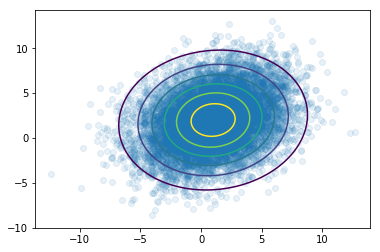

In [56]:
x_0 = 3
y_0 = 8
iteration = 11000
thin = 1
burnin= 1000

samples = gibbs_sampler(sample_X, sample_Y, x_0, y_0, iteration)

plt.scatter(samples[:, 0], samples[:, 1], alpha=0.1)


delta = 0.025
x = np.arange(-10, 10, delta)
y = np.arange(-10, 10, delta)

X, Y = np.meshgrid(x, y)

Z = mlab.bivariate_normal(X, Y, 4, 4, 1, 2, 1.2)
plt.contour(X, Y, Z)

Text(0.5,1,'Y - Samples')

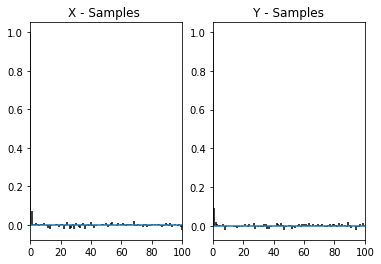

In [58]:
def corrplot(trace, maxlags=50):
    plt.acorr(trace-np.mean(trace),  normed=True, maxlags=maxlags);
    plt.xlim([0, maxlags])
    
plt.subplot(1,2,1)
corrplot(samples[:, 0], 100)
plt.title('X - Samples ')
plt.subplot(1,2,2)
corrplot(samples[:, 1], 100)
plt.title('Y - Samples')

Text(0.5,1,'Y - Burnin')

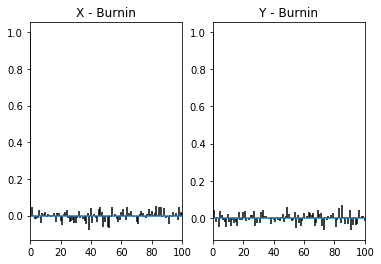

In [59]:
plt.subplot(1,2,1)
corrplot(samples[:1000, 0], 100)
plt.title('X - Burnin')
plt.subplot(1,2,2)
corrplot(samples[:1000, 1], 100)
plt.title('Y - Burnin')

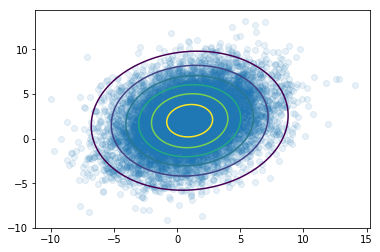

In [51]:
x_0 = 3
y_0 = 8
iteration = 44000
thin = 4
burnin= 4000

samples = gibbs_sampler(sample_X, sample_Y, x_0, y_0, iteration)

plt.scatter(samples[:, 0], samples[:, 1], alpha=0.1)


delta = 0.025
x = np.arange(-10, 10, delta)
y = np.arange(-10, 10, delta)

X, Y = np.meshgrid(x, y)

Z = mlab.bivariate_normal(X, Y, 4, 4, 1, 2, 1.2)
plt.contour(X, Y, Z)

Text(0.5,1,'Y')

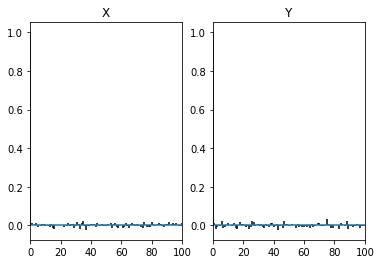

In [52]:
plt.subplot(1,2,1)
corrplot(samples[:, 0], 100)
plt.title('X - Samples')
plt.subplot(1,2,2)
corrplot(samples[:, 1], 100)
plt.title('Y - Samples')

Text(0.5,1,'Y - Samples')

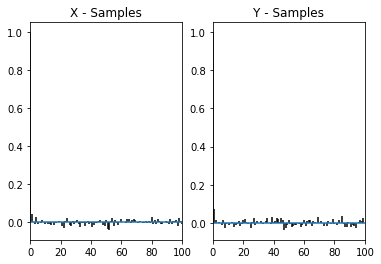

In [60]:
plt.subplot(1,2,1)
corrplot(samples[:4000, 0], 100)
plt.title('X - Samples')
plt.subplot(1,2,2)
corrplot(samples[:4000, 1], 100)
plt.title('Y - Samples')

Given that increasing the thinning value leads to better autocorrelation graphs, choosing a thinning value of 4 makes the sampled values less correlated. The burnin value of 10% prevents our initialization values for x and y from having a significant effect on the samples.  

## Problem 2: Rubber Chickens Bawk Bawk!
In the competitive rubber chicken retail market, the success of a company is built on satisfying the exacting standards of a consumer base with refined and discriminating taste. In particular, customer product reviews are all important. But how should we judge the quality of a product based on customer reviews?

On Amazon, the first customer review statistic displayed for a product is the ***average rating***. The following are the main product pages for two competing rubber chicken products, manufactured by Lotus World and Toysmith respectively:


Lotus World |  Toysmith
- |  - 
![alt](https://am207.github.io/2018spring/homework/lotus1.png) |  ![alt](https://am207.github.io/2018spring/homework/toysmith1.png)

Clicking on the 'customer review' link on the product pages takes us to a detailed break-down of the reviews. In particular, we can now see the number of times a product is rated a given rating (between 1 and 5 stars).

Lotus World |  Toysmith
- |  - 
![alt](https://am207.github.io/2018spring/homework/lotus2.png) |  ![alt](https://am207.github.io/2018spring/homework/toysmith2.png)

(The images above are also included on canvas in case you are offline, see below)

In the following, we will ask you to compare these two products using the various rating statistics. **Larger versions of the images are available in the data set accompanying this notebook**.

Suppose that for each product, we can model the probability of the value each new rating as the following vector:
$$
\theta = [\theta_1, \theta_2, \theta_3, \theta_4, \theta_5]
$$
where $\theta_i$ is the probability that a given customer will give the product $i$ number of stars.


### Part A: Inference

1). Suppose you are told that customer opinions are very polarized in the retail world of rubber chickens, that is, most reviews will be 5 stars or 1 stars (with little middle ground). Choose an appropriate Dirichlet prior for $\theta$. Recall that the Dirichlet pdf is given by:
$$
f_{\Theta}(\theta) = \frac{1}{B(\alpha)} \prod_{i=1}^k \theta_i^{\alpha_i - 1}, \quad B(\alpha) = \frac{\prod_{i=1}^k\Gamma(\alpha_i)}{\Gamma\left(\sum_{i=1}^k\alpha_i\right)},
$$
where $\theta_i \in (0, 1)$ and $\sum_{i=1}^k \theta_i = 1$, $\alpha_i > 0 $ for $i = 1, \ldots, k$.

__Answer__: Since we're told that customer opinions are very polarized in the retail world of rubber chickens, I will assume that 70% of all reviews will be 5 stars or 1 stars (even split), 24% of all reviews will be 4 stars or 2 stars (even split), and the remaining 6% of all reviews will be 3 stars. This will be on a basis of 200 total reviews - which is on a scale that seems to suit these two rubber chicken reviews which have 162 and 410 reviews respectively (by choosing 200, I don't overpower the observed data).

Therefore, the appropriate Dirichlet prior is:
$$Dirichlet(70, 24, 12, 24, 70)$$

2). Write an expression for the posterior pdf, using a using a multinomial model for observed ratings. Recall that the multinomial pdf is given by:
$$
f_{\mathbf{X}\vert  \Theta}(\mathbf{x}) = \frac{n!}{x_1! \ldots x_k!} \theta_1^{x_1} \ldots \theta_k^{x_k}
$$
where $n$ is the total number of trials, $\theta_i$ is the probability of event $i$ and $\sum_i \theta_i = 1$, and $x_i$ is count of outcome $i$ and $\sum_i x_i = n$. 

  **Note:** The data you will need in order to define the likelihood function should be read off the image files included in the dataset.

__Answer__: For each companies, we know the likelihood is a multinomial with parameters which are the same as the observed:
$$\text{Lotus World Likelihood} \sim Multinomial(162, [0.06, 0.04, 0.06, 0.17, 0.67])$$
$$\text{Toysmith Likelihood} \sim Multinomial(410, [0.14, 0.08, 0.07, 0.11, 0.60])$$

With help from the Wikipedia page on conjugate priors (as well as the story of the multinomial and dirichlet as a generalized binomial and beta), we know that the posterior dirichlet will have parameters that are the same as the prior dirichlet + the observed counts of the multinomial.

Therefore, we know our posteriors (here I am rounding things to the nearest integer because of the story of the binomial-beta, where things are counted in integers) and our expression is the respective posterior pdf of each dirichlet:
$$\text{Lotus World Posterior} \sim Dirichlet(10 + 70, 6 + 24, 10 + 12, 28 + 24, 109 + 70) = Dirichlet(80, 30, 22, 52, 179)$$
$$\text{Toysmith Posterior} \sim Dirichlet(57 + 70, 33 + 24, 29 + 12, 45 + 24, 246 + 70) = Dirichlet(127, 57, 41, 69, 316)$$

3). Sample 1,000 values of $\theta$ from the *posterior distribution*.

In [3]:
lw_size = 162
ts_size = 410
lw_observed = np.array([0.06, 0.04, 0.06, 0.17, 0.67])
ts_observed = np.array([0.14, 0.08, 0.07, 0.11, 0.60])
prior = np.array([70, 24, 12, 24, 70])
samplesize = 1000

lw_psamples = np.random.dirichlet((prior + (lw_observed * lw_size)), size=samplesize)
ts_psamples = np.random.dirichlet((prior + (ts_observed * ts_size)), size=samplesize)

4). Sample 1,000 values of $x$ from the *posterior predictive distribution*.

In [4]:
lw_ppsamples = []
ts_ppsamples = []

for sample in lw_psamples:
    lw_ppsamples.append(np.random.multinomial(lw_size, sample))

for sample in ts_psamples:
    ts_ppsamples.append(np.random.multinomial(ts_size, sample))

### Part B: Ranking

1). Name at least two major potential problems with using only the average customer ratings to compare products.

  (**Hint:** if product 1 has a higher average rating than product 2, can we conclude that product 1 is better liked? If product 1 and product 2 have the same average rating, can we conclude that they are equally good?)

__Answer__:

Problem 1: A very small sample size is not representative of the average rating of a product. If a product has only been purchased once and has only received a single 5-star review, that 5-star review is not a large enough sample. The mean and median will both be 5-star but if there are 50 more orders, the average rating could change greatly. This is seen above where Lotus World has 162 reviews and Toysmith has 410. It suggests that Toysmith's sample statistics are much more representative of what you would get if you were to order than Lotus World's sample statistics (basically Toysmith's standard deviation is smaller)

Problem 2: Median vs mean. The average customer rating may be extremely different from the quantile function, which is more representative of how likely a customer is to receive a good or bad chicken. Imagine the scenario where out of the 300 reviews, 100 are 1-star and 200 are 5-star (similar to the prior mentioned in part A). Here, the mean would be 3.67 whereas both the median and mode would be 5. Therefore, depending on the distribution of the stars of a product, the mean may not be the best measure of how good it is.

2). Using the samples from your *posterior distribution*, determine which rubber chicken product is superior. Justify your conclusion with sample statistics.

__Answer__: 

The Toysmith rubber chicken is superior because the median of the Toysmith based on both MAP and mean is 5-stars wheras the median of the Toysmith based on MAP and mean is 4-stars. Additionally, the variance of both posterior distributions is not large enough for it to matter significantly in affecting the possible values of the mean.

However, it's also should be noted that Toysmith generally has more 2 and 3 star reviews than Lotus World, which is more than balanced out by Lotus World having more 1 star reviews. This does mean that we can't completely conclude which one is better, but it seems that Toysmith is.

In [5]:
from scipy.stats import dirichlet

def MAP(data, params):
    prob_max = 0
    max_data = []
    for each in data:
        prob = dirichlet.pdf(each, params)
        if prob > prob_max:
            prob_max = prob
            max_data = each
    return(max_data, prob_max)

lw_MAP, lw_MAPpdf = MAP(lw_psamples, prior + (lw_observed * lw_size))
ts_MAP, ts_MAPpdf = MAP(ts_psamples, prior + (ts_observed * ts_size))

print("Lotus World MAP =", lw_MAP)
print("Lotus World Mean =", dirichlet.mean(prior + (lw_observed * lw_size)))
print("Lotus World Var=", dirichlet.var(prior + (lw_observed * lw_size)))

print("Toysmith MAP =", ts_MAP)
print("Toysmith Mean =", dirichlet.mean(prior + (ts_observed * ts_size)))
print("Toysmith Var", dirichlet.var(prior + (ts_observed * ts_size)))

Lotus World MAP = [0.21461559 0.08168977 0.05953749 0.14367794 0.5004792 ]
Lotus World Mean = [0.22022099 0.0841989  0.06       0.14237569 0.49320442]
Lotus World Var= [0.00047307 0.00021242 0.00015537 0.00033638 0.00068858]
Toysmith MAP = [0.21204477 0.09083763 0.06185693 0.11346164 0.52179904]
Toysmith Mean = [0.20885246 0.09311475 0.06672131 0.11327869 0.51803279]
Toysmith Var [0.00027043 0.00013821 0.00010191 0.0001644  0.00040863]


3). Using the samples from your *posterior predictive distribution*, determine which rubber chicken product is superior. Justify your conclusion with sample statistics.

__Answer__: Toysmith is superior (according to our limited sample statistics) because of several things: (1) the average customer rating is higher and (2) the lower bound is higher. However, it's also notable that lotus world does have a higher 95% cap (it also has a lower 95% bound) because of its smaller number of reviews. However because it seems that both the lower bound and mean are higher for Toysmith, I can hesitantly say that Toysmith is superior - although we do need to do further analysis on the spread of each posterior predictive distribution.

In [7]:
stars = [1, 2, 3, 4, 5]
scaled_stars = [0.2, 0.4, 0.6, 0.8, 1]

def lowerbound(data):
    users = sum(data)
    a = 1 + sum(data * scaled_stars)
    b = 1 + users - sum(data * scaled_stars)
    temp = a / (a+b)
    temp2 = 1.65*(np.sqrt( (a*b) / ( ((a+b)**2)*(a+b+1)) ) )
    return(temp - temp2)

### Lotus World Average Stars
temp = np.mean(lw_ppsamples, axis = 0)
lw_avg = sum(temp * stars) / sum(temp)
print("Lotus World Average Customer Rating =", lw_avg)

### Toysmith Median Rating - Seen through Rating Distribution
print("Lotus World Rating Distribution (Values from 1 to 5) =", np.sum(lw_ppsamples, axis = 0))

### Lotus World Average Stars 95% CI
bootstrap = []
for each in lw_ppsamples:
    bootstrap.append(sum(stars * each) / sum(each))
lw_95 = np.percentile(bootstrap, (2.5, 97.5))
print("Lotus World Average Customer Rating 95% CI =", lw_95)

### Lotus World Lower Bound
lw_mean = np.sum(lw_ppsamples, axis = 0)/(samplesize)
print("Lotus World Lower Bound", lowerbound(lw_mean)*5) ### Using the lower bound as discussed in http://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter4_TheGreatestTheoremNeverTold/Ch4_LawOfLargeNumbers_PyMC2.ipynb

### Toysmith Average Stars
temp = np.mean(ts_ppsamples, axis = 0)
ts_avg = sum(temp * stars) / sum(temp)
print("Toysmith Average Customer Rating =", ts_avg)

### Toysmith Median Rating - Seen through Rating Distribution
print("Toysmith Rating Distribution (Values from 1 to 5) =", np.sum(ts_ppsamples, axis = 0))

### Toysmith Average Stars 95% CI
bootstrap = []
for each in ts_ppsamples:
    bootstrap.append(sum(stars * each) / sum(each))
ts_95 = np.percentile(bootstrap, (2.5, 97.5))
print("Toysmith Average Customer Rating 95% CI =", ts_95)

### Toysmith Lower Bound
ts_mean = np.sum(ts_ppsamples, axis = 0)/(samplesize)
print("Toysmith Lower Bound", lowerbound(ts_mean)*5) ### Using the lower bound as discussed in http://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter4_TheGreatestTheoremNeverTold/Ch4_LawOfLargeNumbers_PyMC2.ipynb

Lotus World Average Customer Rating = 3.611956790123457
Lotus World Rating Distribution (Values from 1 to 5) = [35515 13510  9585 23103 80287]
Lotus World Average Customer Rating 95% CI = [3.31466049 3.92592593]
Lotus World Lower Bound 3.3099207439313423
Toysmith Average Customer Rating = 3.639431707317073
Toysmith Rating Distribution (Values from 1 to 5) = [ 85152  38305  27876  46558 212109]
Toysmith Average Customer Rating 95% CI = [3.43890244 3.84878049]
Toysmith Lower Bound 3.453001303927379


4). Finally, which rubber chicken product is superior?

  (**Note:** we're not looking for "the correct answer" here, any sound decision based on a statistically correct interpretation of your model will be fine)
  
__Answer__: 

From our analysis, Toysmith seems better although I have mentioned in both analyses that it's not correct to conclude with 100% certainty that Toysmith is better.

## Problem 3:  Implementing Rat Tumors in pymc3

(it may help to see the bioassay lab to see how to structure pymc3 code, and also the examples from lecture).

Let us try to do full Bayesian inference with PyMC3 for the rat tumor example that we have solved using explicit Gibbs sampling in lab7. Remember that the goal is to estimate $\theta_i$, the probability of developing a tumor in a population of female rats that have not received treatement. 

The posterior for the 70 experiments may be written thus:

$$p( \{\theta_i\}, \alpha, \beta  \vert  Y, \{n_i\}) \propto p(\alpha, \beta) \prod_{i=1}^{70} Beta(\theta_i, \alpha, \beta) \prod_{i=1}^{70} Binom(n_i, y_i, \theta_i)$$

Use uniform priors on $[0,1]$ on the alternative variables $\mu$ (the mean of the beta distribution) and $\nu$:

$$\mu = \frac{\alpha}{\alpha+\beta}, \nu = (\alpha+\beta)^{-1/2}$$

You may then write $\alpha$ and $\beta$ as deterministics which depend on $\mu$ and $\nu$.

Here is the data:

In [2]:
tumordata="""0 20 
0 20 
0 20 
0 20 
0 20 
0 20 
0 20 
0 19 
0 19 
0 19 
0 19 
0 18 
0 18 
0 17 
1 20 
1 20 
1 20 
1 20 
1 19 
1 19 
1 18 
1 18 
3 27 
2 25 
2 24 
2 23 
2 20 
2 20 
2 20 
2 20 
2 20 
2 20 
1 10 
5 49 
2 19 
5 46 
2 17 
7 49 
7 47 
3 20 
3 20 
2 13 
9 48 
10 50 
4 20 
4 20 
4 20 
4 20 
4 20 
4 20 
4 20 
10 48 
4 19 
4 19 
4 19 
5 22 
11 46 
12 49 
5 20 
5 20 
6 23 
5 19 
6 22 
6 20 
6 20 
6 20 
16 52 
15 46 
15 47 
9 24 
"""

### Part A:  Report at least the following diagostics on your samples

1. Autocorrelation (correlation dying by lag 20 is fine)
2. Parameter trace correlation after burnin
3. Gewecke
4. Gelman-Rubin
5. $n_{eff}$ (Number of Effective Samples)

### Part 1

In [3]:
import pymc3 as pm
from pymc3 import Beta, Binomial, sample, Model, Deterministic # Import relevant distributions
from pymc3.math import invlogit
from theano import shared

In [4]:
tumortuples=[e.strip().split() for e in tumordata.split("\n")]
tumory=np.array([np.int(e[0].strip()) for e in tumortuples if len(e) > 0])
tumorn=np.array([np.int(e[1].strip()) for e in tumortuples if len(e) > 0])
tumory, tumorn     

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
         1,  1,  1,  1,  1,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  5,
         2,  5,  2,  7,  7,  3,  3,  2,  9, 10,  4,  4,  4,  4,  4,  4,  4,
        10,  4,  4,  4,  5, 11, 12,  5,  5,  6,  5,  6,  6,  6,  6, 16, 15,
        15,  9]),
 array([20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 18, 18, 17, 20, 20, 20,
        20, 19, 19, 18, 18, 27, 25, 24, 23, 20, 20, 20, 20, 20, 20, 10, 49,
        19, 46, 17, 49, 47, 20, 20, 13, 48, 50, 20, 20, 20, 20, 20, 20, 20,
        48, 19, 19, 19, 22, 46, 49, 20, 20, 23, 19, 22, 20, 20, 20, 52, 46,
        47, 24]))

In [5]:
with Model() as model:

    mu = Beta('mu', 1, 1)
    nu = Beta('nu', 1, 1)
    
    alpha = Deterministic('alpha', mu / nu**2)
    beta = Deterministic('beta', nu**(-2) - alpha)
    
    theta = Beta('theta', alpha, beta, shape=70)

    obs = Binomial('obs', n=shared(tumorn), p=theta, observed=tumory)

In [ ]:
with model:
    
    # instantiate sampler
    step = pm.NUTS()
    
    # draw 2000 posterior samples
    samples = sample(50000, step=step)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta_logodds__, nu_logodds__, mu_logodds__]
  6%|▌         | 3084/50500 [00:39<10:04, 78.45it/s]

In [7]:
samples_burnin = samples[5000:]

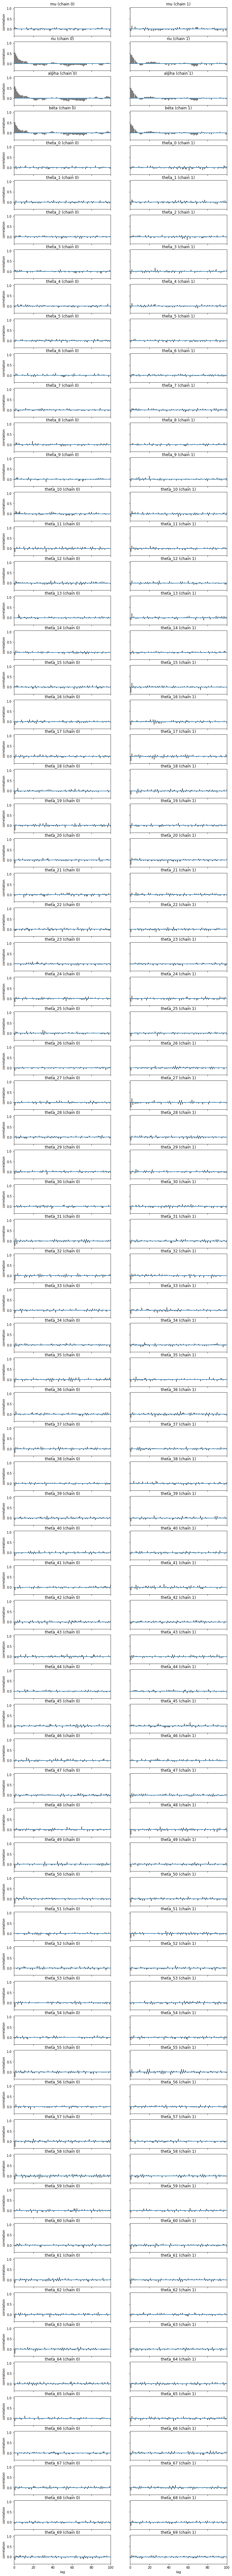

In [9]:
pm.autocorrplot(samples_burnin)
plt.show()

The autocorrelations fo $\alpha$, $\beta$ and all $\theta$'s are close to 0 after lag 20, so the samples for $\alpha$, $\beta$, and $\theta$'s seem to have converged.

### Part 2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c18ddb2b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c18dd50f0>]], dtype=object)

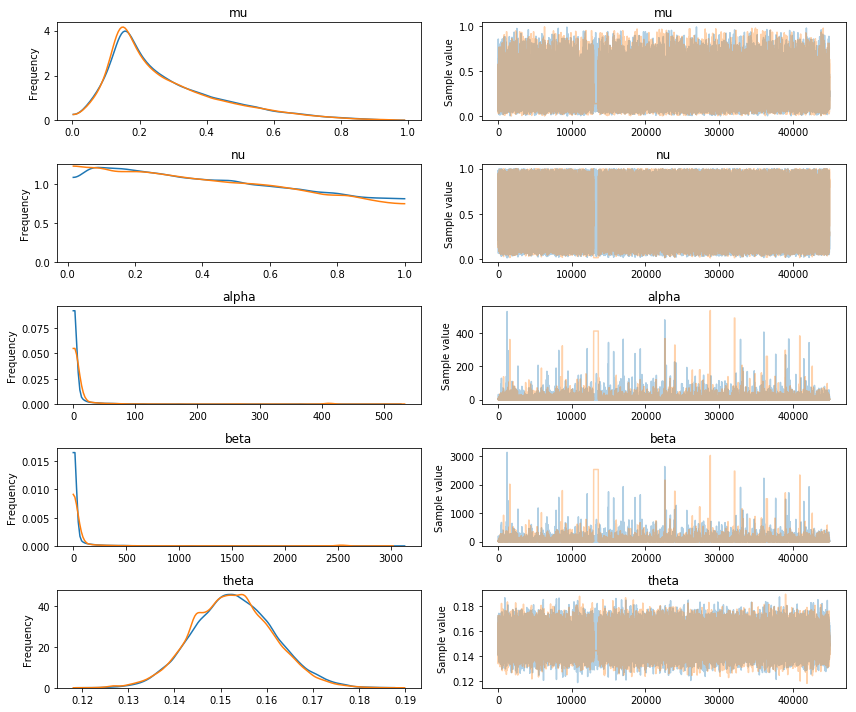

In [25]:
pm.traceplot(samples_burnin)
plt.show()

The trace plots for $\alpha$, $\beta$ and $\theta$'s seem to have converged.

In [ ]:
df = pm.trace_to_dataframe(samples_burnin)
df.corr()

### Part 3

In [ ]:
z = pm.geweke(samples_burnin, intervals=15)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i in range(2):
    axes[i].scatter(*z[i]['alpha'].T)
    axes[i].hlines([-1, 1], 0, 22550, linestyles='dotted')
    axes[i].xlim(0, 22550)
    axes[i].set_title(r'$\alpha$')

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i in range(2):
    axes[i].scatter(*z[i]['beta'].T)
    axes[i].hlines([-1, 1], 0, 22550, linestyles='dotted')
    axes[i].xlim(0, 22550)
    axes[i].set_title(r'$\beta$')

In [ ]:
fig, axes = plt.subplots(14, 5, figsize=(25, 70))

for i in range(70):
    index_row = int(np.floor(i / 5))
    index_col = i % 5
    axes[i].scatter(*z[0]['theta'][i].T)
    axes[i].hlines([-1, 1], 0, 22550, linestyles='dotted')
    axes[i].xlim(0, 22550)
    axes[i].set_title(r'$\theta$' + str(i + 1))

In [ ]:
fig, axes = plt.subplots(14, 5, figsize=(25, 70))

for i in range(70):
    index_row = int(np.floor(i / 5))
    index_col = i % 5
    axes[i].scatter(*z[1]['theta'][i].T)
    axes[i].hlines([-1, 1], 0, 22550, linestyles='dotted')
    axes[i].xlim(0, 22550)
    axes[i].set_title(r'$\theta$' + str(i + 1))

The z-scores for $\alpha$, $\beta$ and $\theta$'s are all within 2 standard deviations from 0, the samples for $\alpha$, $\beta$ and $\theta$'s seem to have converged.

### Part 4

In [ ]:
pm.gelman_rubin(samples_burnin)

In [ ]:
pm.forestplot(samples_burnin)

Since all $\hat{R}$ values are close to 1 for $\alpha$, $\beta$ and $\theta$'s, it is probable that thet samples for these parameters have converged.

### Part 5

In [20]:
pm.effective_n(samples_burnin)

{'alpha': 273.0, 'beta': 247.0, 'mu': 28902.0, 'nu': 6188.0, 'theta': 21418.0}

The sampling procedure produced a warning 

### Part B:  Posterior predictive check

Recall from lab notes that in a hierarchical model there are two kinds of posterior predictions that are useful. (1) The distribution of future observations $y_i^*$  given a $\theta_i$, and (2) The distribution of observations $y_j^*$  drawn from a future $\theta_j$ drawn from the super-population (i.e. using the Beta on the estimated hyper parameters).

1. Carry out posterior predictive checks by using `sample_ppc` to generate posterior-predictives for all 70 experiments. This generates predictives of the first type above. 

2. Plot histograms for these predictives with the actual value shown as a red-dot against the histogram (as in the coal disasters model in lecture 14). Is the data consistent with the predictive?

### Part 1

In [ ]:
with model:
    sims_ppc = sample_ppc(samples_burnin, samples=1000)

In [ ]:
fig, axes = plt.subplots(14, 5, figsize=(25, 70))

for i in range(70):
    index_row = int(np.floor(i / 5))
    index_col = i % 5
    axes[index_row, index_col].hist(sims_ppc['obs'].T[i])
    axes[index_row, index_col].plot(tumory[i] + 0.5, 1, 'ro')

### Part C:  Shrinkage

1. Plot the posterior median of the death rate parameters $\theta_1, \theta_2, ...\theta_{70}$ against the observed death rates ($y_i/n_i$)

2. Explain the shrinkage by comparing against a 45 degree line as done in the lab.

In [ ]:
median_post = np.median(sample_burnin['theta'].T, axis=1)
observed = tumory / tumorn

In [ ]:
plt.scatter(observed, median_post)
plt.plot([0, 0], [0.5, 0.5], 'k-')
plt.xlabel('Observed Rates')
plt.ylabel('Posterior Medians')
plt.title(r'$\theta$ for Experiments')

### PART D:  Experiment 71

Consider an additional experiment -- experiment 71 -- in which 4 out of 14 rats died. 

1. Calculate the marginal posterior of $\theta_{71}$, the "new" experiment,

2. Find the $y_{71}^*$ posterior predictive for that experiment.

**HINT: ** The critical thing to notice is that the posterior including the 71st experiment factorizes:

$$p(\theta_{71}, \theta_{1..70}, \alpha, \beta \vert  D)  \propto p(y_{71} \vert n_{71}, \theta_{71} ) p(\theta_{71} \vert \alpha, \beta) p(\theta_{1..70}, \alpha, \beta \vert  D)$$

Then we simply marginalize over everything to get the $\theta_{71}$ posterior:

$$p(\theta_{71} \vert \theta_{1..70}, \alpha, \beta, D) = \int d\alpha \,d\beta \,d\theta_{1..70} \,p(\theta_{71}, \theta_{1..70}, \alpha, \beta \vert  D)$$

$$=  \int d\alpha \,d\beta  Beta(\alpha+y_{71}, \beta + n_{71} - y_{71})  \int_{\theta_{1..70}} \,d\theta_{1..70} \,p(\theta_{1..70}, \alpha, \beta \vert  D)$$

The $y_{71}^*$ posterior predictive can be found in the usual way.

### Part 1

In [24]:
import seaborn as sns

In [ ]:
alpha_trace = samples_burnin['alpha']
beta_trace = samples_burnin['beta']
theta_71_post = beta.rvs(alpha_trace + 4, beta_trace + 10)

In [ ]:
sns.kdeplot(theta_71_post)
plt.xlabel(r'$\theta_{71}$')
plt.ylabel('Density')
plt.title(r'Marginal Posterior of $\theta_{71}$')

### Part 2

In [ ]:
y_71_star = binom.rvs(n=14, p=theta_71_post)

In [ ]:
plt.hist(y_71_star, normed=True)
plt.xlabel(r'$\y_{71}^{*}$')
plt.ylabel('PMF')
plt.title(r'Posterior Predictive of $\y_{71}^{*}$')